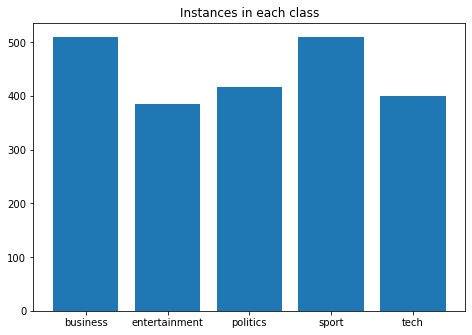

In [35]:
import matplotlib.pyplot as plt

#Plotting a bar graph that shows the amount of documents in each of the 5 classes

figure = plt.figure()
figure.add_axes([0,0,1,1])
classes = ['business', 'enterainment', 'politics', 'sport', 'tech']
instances = [510,386,417,511,401]
plt.bar(classes,instances)
plt.title('Instances in each class')
figure.savefig('BBC-distribution.pdf', bbox_inches = "tight")



In [40]:
from sklearn.datasets import load_files
corpus=load_files("/Users/Ivan/Desktop/BBC", encoding='latin 1')


In [44]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)






In [73]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest= train_test_split(X, train_size = 0.8, test_size=0.2)    


In [75]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(Xtrain, Xtest)



ValueError: y should be a 1d array, got an array of shape () instead.